### Overview

* Introduction
* Data collection
* Generation 1 choice - only choose best.  Look at diversity.
* Full population choice - only choose best.  Again look at diversity.
* The GP covariance model
* Introducing diversity I: exact calculation
* Conclusion


In [1]:
from __future__ import print_function, division

### Introduction.

Blah blah blah - trying to have High Cox1 low cox 2.

### Data Collection.

Blah blah blah MOARF...

In [2]:
import numpy as np
import pandas as pd

In [8]:
# Read in the input data generated by MOARF
pd.read_csv('cox_sims_all.csv')

,smiles,cox1,cox2,pop_num,cox_1_sim_smi,cox_2_sim_smi,cox_1_sim_score,cox_2_sim_score
0,CCC(c1ccccc1)c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=...,5.125014,6.310851,1,NS(=O)(=O)c1ccc(-n2cc(C(F)(F)F)nc2-c2ccccc2)cc1,NS(=O)(=O)c1ccc(-n2cc(C(F)(F)F)nc2-c2ccccc2)cc1,0.682927,0.682927
1,CCc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,5.014784,6.486585,1,Cc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,Cc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,0.846154,0.846154
2,Cc1cc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2)...,5.166806,7.101646,1,Cc1ccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2...,Cc1cc(Cl)cc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=...,0.837838,0.842105
3,Cc1ccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2...,5.330206,7.016396,1,Cc1ccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2...,Cc1ccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2...,0.861111,0.861111
4,Cc1ccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2...,4.712130,6.588411,1,Cc1ccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2...,Cc1ccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2...,1.000000,1.000000
5,Cc1ccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2)o1,4.966712,6.624913,1,Cc1cc(F)cc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O...,Cc1cc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc2)no1,0.725000,0.780488
6,Cc1ccc(S(=O)(=O)Nn2cc(C(F)(F)F)nc2-c2ccccc2C)cc1,5.121074,6.141813,1,Cc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,Cc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,0.613636,0.613636
7,Cc1cccc(-c2nc(C(F)(F)F)cn2-c2ccc(S(N)(=O)=O)cc...,4.977372,6.778117,1,Cc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,Cc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,0.871795,0.871795
8,Cc1ccccc1-c1c(C(F)(F)F)ncn1-c1ccc(S(N)(=O)=O)cc1,5.287710,6.588887,1,NS(=O)(=O)c1ccc(-n2cnc(Cl)c2-c2ccccc2)cc1,NS(=O)(=O)c1ccc(-n2cnc(Cl)c2-c2ccccc2)cc1,0.682927,0.682927
9,Cc1ccccc1-c1cc(C(F)(F)F)ccc1Nc1ccc(S(N)(=O)=O)cc1,5.247465,7.348722,1,Cc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,Cc1ccccc1-c1nc(C(F)(F)F)cn1-c1ccc(S(N)(=O)=O)cc1,0.590909,0.590909


In [9]:
df = pd.read_csv('cox_sims_all.csv')

In [10]:
# The table actually has dupes... 
df = df.drop_duplicates(subset='smiles')

In [11]:
df.shape

(182735, 8)

### Generation 1 Choice - only choose the best molecules.

The goal is to maximize Cox-2 activity while minimizing Cox-1 activity.  But we need a notion of 'thresholds' to know what we are looking for.  Let say...

**GOAL**:  Find a molecule with Cox-2 activity >= 8 and Cox-1 activity <= 4.

We're going to look initially at the first generation of MOARF suggestions.

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from scipy import stats
import joblib
from rdkit.Chem import AllChem

Let's first check that (as we expect) no MOARF suggestions actually are _expected_ to reach these thresholds...

In [13]:
sum(df['cox1'].values <= 4)

0

In [14]:
sum(df['cox2'].values >= 8)

110

In [15]:
np.min(df['cox1'].values[df['cox2'].values >= 8])

4.98420325948445

In [16]:
idcs = np.arange(df.shape[0])[(df['cox1'] <=5) & (df['cox2'] >=8)]

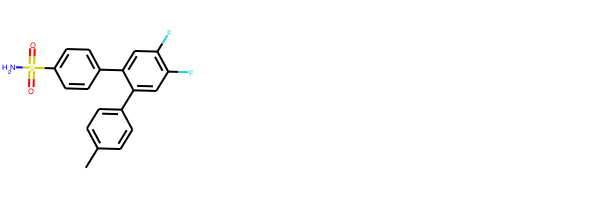

In [17]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(df['smiles'][df.index[x]]) for x in idcs])

In [18]:
# We're initially going to select from the first round of evolution (pop_num =1)
df1 = df.loc[df['pop_num'] == 1]

In [19]:
from scipy.stats import norm

In [20]:
def get_prob_good(dft, tgt_cox1=4, tgt_cox2=8, err=1.5):
    
    prob1 = norm.cdf((tgt_cox1 -  dft['cox1'].values)/err)
    prob2 = norm.cdf((dft['cox2'].values - tgt_cox2)/err)
    return prob1*prob2

In [21]:
np.max(get_prob_good(df1))

0.09750537998877097

In [22]:
np.max(get_prob_good(df))

0.13595391165546986

Interesting to see that the probability does get better as you go through the successive generations...

Let's plot the 10 best molecules from generation 1...

[ 79 295 406 296 401 298 338 297 126 278]


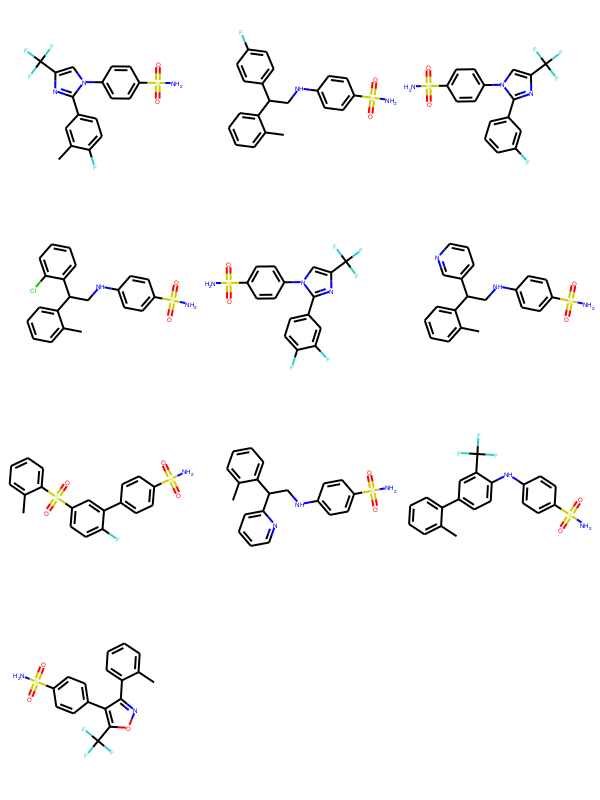

In [23]:
best1 = np.argsort(get_prob_good(df1))[-10:]
print(best1)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(df1['smiles'][df1.index[x]]) for x in best1])

Now let's think about the diversity of these choices.  We've chosen 10 molecules, so there are 45 pairwise comparisons we can make.

First though, assuming that the testing results of these molecules were all independent, what would we expect the probability of success to be?  Answer - 56%.

In [24]:
pgg1 = get_prob_good(df1)
1 - np.prod(1 - pgg1[np.argsort(pgg1)[-10:]])

0.5641138753288797

Of course - it's fairly obvious even just from looking at the molecules selected that these choices aren't going to be independent.  To start assessing how independent these choices are, we're going to need to add fingerprints...

In [25]:
fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x),2,nBits=128) for x in df['smiles']]

In [26]:
df['fps'] = pd.Series([np.asarray(fp) for fp in fps], index=df.index)

In [27]:
# We're initially going to select from the first round of evolution (pop_num =1)
df1 = df.loc[df['pop_num'] == 1]

In [28]:
from scipy.spatial.distance import pdist, squareform, jaccard, cityblock

In [29]:
np.average(pdist(np.vstack(df1['fps'].values[best1]), metric='jaccard'))

0.507283816845599

In [30]:
np.min(pdist(np.vstack(df1['fps'].values[best1]), metric='jaccard'))

0.10526315789473684

In [31]:
squareform(pdist(np.vstack(df1['fps'].values[best1]), metric='jaccard'))

array([[0.        , 0.62264151, 0.26190476, 0.63461538, 0.10526316,
        0.61111111, 0.48888889, 0.65454545, 0.5       , 0.54901961],
       [0.62264151, 0.        , 0.62962963, 0.28571429, 0.64814815,
        0.27272727, 0.53191489, 0.33333333, 0.56862745, 0.58490566],
       [0.26190476, 0.62962963, 0.        , 0.64150943, 0.26190476,
        0.64285714, 0.53191489, 0.66071429, 0.51020408, 0.52941176],
       [0.63461538, 0.28571429, 0.64150943, 0.        , 0.66037736,
        0.31818182, 0.54347826, 0.30232558, 0.58      , 0.56862745],
       [0.10526316, 0.64814815, 0.26190476, 0.66037736, 0.        ,
        0.63636364, 0.52173913, 0.65454545, 0.56      , 0.57692308],
       [0.61111111, 0.27272727, 0.64285714, 0.31818182, 0.63636364,
        0.        , 0.55102041, 0.28888889, 0.5       , 0.51923077],
       [0.48888889, 0.53191489, 0.53191489, 0.54347826, 0.52173913,
        0.55102041, 0.        , 0.6       , 0.41860465, 0.47826087],
       [0.65454545, 0.33333333, 0.6607142

# Full population choice

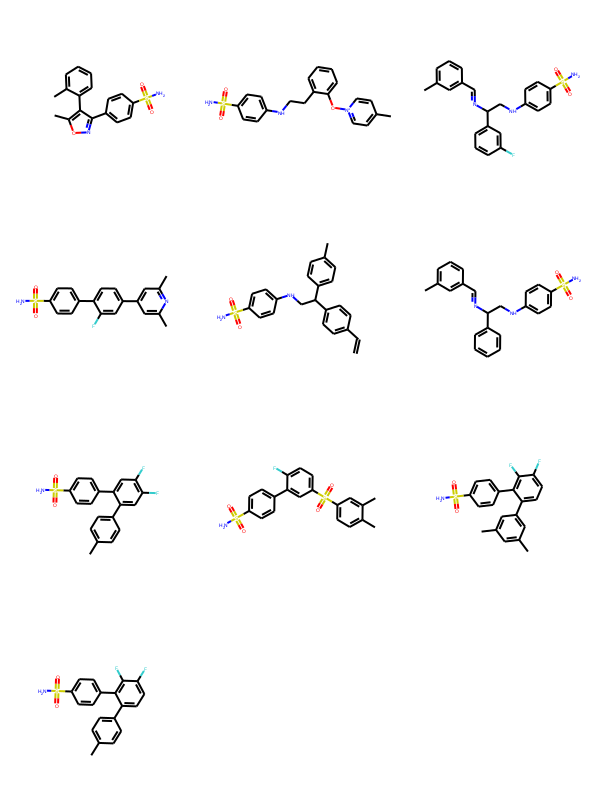

In [32]:
best_all = np.argsort(get_prob_good(df))[-10:]
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(df['smiles'][df.index[x]]) for x in best_all])

Again - if these choices were all independent, we'd expect an almost 75% chance of success.

In [33]:
pggf = get_prob_good(df)
1 - np.prod(1 - pggf[np.argsort(pggf)[-10:]])

0.7480191341696949

If instead we chose 20 molecules (and these choices were still independent) then we'd be up to 93%

In [34]:
1 - np.prod(1 - pggf[np.argsort(pggf)[-20:]])

0.9326478964634949

### The GP Covariance model

From earlier work, it seems like the covariance of the errors of molecular activity as a function of Tanimoto similarly is given by the function $k$ below.

In [35]:
tani_base_dist = 0.3

def k(tani):
    
    id_var = 0.5 if tani == 0 else 0
    
    return id_var + 1.5**2 * np.exp(-tani/(2*tani_base_dist**2))

In [36]:
K = np.vectorize(k)

So now we can calcualate exactly (well, using an MC approximation) the probability that a given set of candidates has at least one molecule in the target area.

In [37]:
tgt_cox1 = 4.
tgt_cox2 = 8.

def gp_value(my_df, candidates, correction=1.0, num_runs=10000):
    
    # Calculate the probability that at least one
    # of the candidates is in the desired target area.  Correction is
    # the number by which the off-diagonal elements of the covariance matrix 
    # are scaled.
    
    my_sigma = np.sqrt(k(0))
    
    pred_cox2 = my_df['cox2'][my_df.index[candidates]]
    pred_cox1 = my_df['cox1'][my_df.index[candidates]]

    cov = K(squareform(pdist(np.vstack(my_df['fps'][my_df.index[candidates]]), metric='jaccard')))
    
    if correction != 1.0:
        dcov = np.diag(np.diag(cov))
        cov = dcov + correction * (cov - dcov)
        pass

    # Note - an advanced version of this would account for correlation of cox1 and cox2...
    vc1 = np.random.multivariate_normal(pred_cox1, cov, num_runs)
    vc2 = np.random.multivariate_normal(pred_cox2, cov, num_runs)
    
    pgood = np.sum(np.sum((vc1 <= tgt_cox1) & (vc2 >= tgt_cox2), axis=1) > 0) / num_runs
    return pgood

So - choosing from population 1 - best 10 have a 58% chance of producing a hit (60% if we didn't care about correlation)

In [38]:
gp_value(df1, best1)

0.5855

In [39]:
gp_value(df1, best1, correction=0)

0.6163

Choosing from the full population - 73% of getting it right with top 10 choices, as opposed to 78% if we worried about correlation..

In [40]:
gp_value(df, best_all)

0.7337

In [41]:
gp_value(df, best_all, correction=0.)

0.782

So, slightly depressingly, the punchline is, we really don't care about the correlation...

### Supposing it did actually matter...

In [42]:
def neg_gp_value(*args, **kwargs):
    return -1 * gp_value(*args, **kwargs)

In [43]:
def stochastic_search(my_df, num_to_choose=20, temp=0.997, tmax=10000, init=None, 
                      lf_kw={'correction' : 1}, loss_func=neg_gp_value):
    
    temperature = temp
    
    size = my_df.shape[0]

    if init is None:
        candidates = np.random.choice(np.arange(size), num_to_choose, replace=False)
    else:
        candidates = init
        pass
    
    time = 1
    
    while time < tmax:
        
        if time % 100 == 0:
            print('Time now %d - value %.2f' % (time, loss_func(my_df, candidates, **lf_kw)))
            pass
        
        choices = np.delete(np.arange(size), candidates)
        old_candidate = np.random.choice(candidates, 1)
        new_candidate = np.random.choice(choices, 1)
        
        new_candidates = candidates.copy()
        new_candidates[new_candidates == old_candidate] = new_candidate
        
        old_loss = loss_func(my_df, candidates, **lf_kw)
        new_loss = loss_func(my_df, new_candidates, **lf_kw)
        
        if old_loss > new_loss:
            candidates = new_candidates
        else:
            temperature = temp**time
            
            if np.random.random() < temperature:
                candidates = new_candidates
            pass
        pass
                    
        time+=1
        pass
    
    print ('At tmax, value was %9.2f' % loss_func(my_df, candidates, **lf_kw))
    return candidates

In [44]:
#chosen = stochastic_search(df)

In [45]:
best_20 = np.argsort(get_prob_good(df))[-20:]

In [46]:
gp_value(df, best_20)

0.9028

This isn't great - the best 20 of all have a 90% probability of success (as compared to 93 if you don't worry about correlation in the experimental results).  We'll investigate better stocastic search params to see if you get closer to the truth...  But basically this is academic, since we know what the truth is.

### Looking at intersection of MOARF and MOLPORT

In [47]:
from standardiser import standardise

In [48]:
import glob
molport_files = glob.glob('/Users/owatson/evartech/molport/unstandardised/*')

In [49]:
fpd = pd.read_csv(molport_files[1], sep='\t', low_memory=False)

In [63]:
fpd.SMILES_CANONICAL.values[1]

'O=C(NCCCN1CCOCC1)c1cnn2c(cc(nc12)-c1ccccc1)-c1ccccc1'

In [64]:
std_mol = standardise.run(fpd.SMILES[1])

In [65]:
std_mol == fpd.SMILES_CANONICAL.values[1]

False

In [66]:
def get_isidro_smile(x):
    try:
        return standardise.run(x)
    except standardise.StandardiseException as e:
        return 'None'

In [102]:
def add_issm(fn_in, fn_out=None, compression=None, sm_str='SMILES', sep=','):
    df = pd.read_csv(fn_in, sep=sep, low_memory=False)
    is_smiles = []
    for (i, x) in enumerate(df[sm_str].values):
        if i % 50000 == 0:
            print('%s %d' % (fn_in, i))
            pass
        is_smiles.append(get_isidro_smile(x))
        pass
    mism = pd.Series(is_smiles, index=df.index)
    df = df.assign(SMILESIS=mism)
    
    if fn_out is None:
        fn_out = fn_in
        pass
    
    df.to_csv(fn_out, compression=compression)
    return

In [22]:
from rdkit import rdBase
rdBase.DisableLog('rdApp.error')

In [98]:
import os.path

In [4]:
#add_issm('cox_sims_all.csv', 'cox_sims_all.csv.gz', compression='gzip', sm_str='smiles')

In [3]:
#for (i, f) in enumerate(molport_files):
#    fn_o = '/Users/owatson/evartech/molport/standard.' + str(i) + '.csv.gz'
#    if not os.path.isfile(fn_o):
#        add_issm(f, fn_o, compression='gzip', sep='\t')
#        pass
#    pass

In [19]:
import glob
std_files = glob.glob('/Users/owatson/evartech/molport/standard.*')

In [53]:
df = pd.read_csv('cox_sims_all.csv.gz')

In [92]:
frames = []
for fn in std_files:
    df1 = pd.read_csv(fn, low_memory=False)
    dfi = df.join(df1.set_index('SMILESIS'), on='SMILESIS', how='inner', rsuffix='mp_')
    frames.append(dfi)

In [98]:
fdf = pd.concat(frames).drop_duplicates(subset='SMILES_CANONICAL')

In [103]:
fdf[['smiles', 'cox1', 'cox2', 'PRICERANGE_5MG', 'PRICERANGE_50MG']]

,smiles,cox1,cox2,PRICERANGE_5MG,PRICERANGE_50MG
94268,NS(=O)(=O)c1ccc(NC(=O)c2ccc(Oc3ccccc3)cc2)cc1,5.101221,5.183795,< 50,100 - 500
127140,NS(=O)(=O)c1ccc(NC(=O)c2ccc(-c3ccccc3)cc2)cc1,4.875578,5.924702,< 50,50 - 100
11972,Cc1ccccc1-c1nc(C(=O)Nc2ccccc2C(N)=O)cs1,5.335583,5.677039,50 - 100,100 - 500
28593,NS(=O)(=O)c1ccc(-n2nc(C(F)(F)F)cc2-c2ccccc2)cc1,4.713926,6.485647,100 - 500,null
62636,NS(=O)(=O)c1ccc(N=Cc2ccc(OC(=O)c3cccnc3)cc2)cc1,4.628725,5.537675,50 - 100,100 - 500
160237,NS(=O)(=O)c1ccc(Nc2cc(-c3ccccc3)ncn2)cc1,5.436168,7.738778,< 50,100 - 500
218068,Clc1ccc(C=Nc2ccc(Oc3ccccc3)cc2)c(Cl)c1,5.656161,6.172894,< 50,50 - 100
18564,Cc1ccccc1N=Cc1ccc(OC(=O)c2ccccc2Cl)cc1,5.247317,5.734812,< 50,null
46786,Cc1ccc(N=Cc2ccc(OS(=O)(=O)c3ccc(C)cc3)cc2)cc1,4.868498,5.472933,< 50,null


### Looking at top molecules from MOLPORT

In [4]:
# Load up the evaluator...
import joblib
mdl_holder = joblib.load('moarf/models/c1_c2_mdls')

In [5]:
def get_data(tgt_name='ABL1'):
    data_dir = 'moarf/datasets/'+ tgt_name + '/'
    resps =  joblib.load(data_dir + tgt_name + "_respu.npy")
    preds =  joblib.load(data_dir + tgt_name + "_predsu.npy")
    smiles = joblib.load(data_dir + tgt_name + '.smiu')
    return preds, resps, smiles

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model as LM

In [7]:
def regress(response, pred_list, one=False, do_print=True):

    regr = LM.LinearRegression(fit_intercept=one)
    regr.fit(np.asarray(pred_list).swapaxes(0, 1), response)
    
    presp = regr.predict(np.asarray(pred_list).swapaxes(0, 1))
    r2 = r2_score(response, presp)
    if do_print:
        if one:
            rs = ('%6.4f '* (len(pred_list) + 1)) % (tuple(regr.coef_) + (regr.intercept_,))
        else:
            rs = ('%6.4f '* (len(pred_list)) % tuple(regr.coef_))
        print ('Coeffs:       ' + rs)
        print ('R-squared: {:9.4f}'.format(r2))
    else:
        return regr.coef_, r2

In [9]:
# get the data...
pcox1, rcox1, smcox1 = get_data('COX-1')
pcox2, rcox2, smcox2 = get_data('COX-2')

In [10]:
# Cox1 - ridge (INSAMPLE)
regress(rcox1, [mdl_holder['COX-1']['ridge'].predict(pcox1),], one=False)

Coeffs:       1.0000 
R-squared:    0.3616


In [11]:
def full_boostrap(preds, resps, method, num_runs=40):

    r_2s = []
    betas = []

    N = len(resps)
    for i in range(num_runs):
        idcs = np.random.choice(N, N)
        oos = np.delete(np.arange(N), idcs)
        
        mdl = model_dict[method]['m'](**model_dict[method]['kw'])
        mdl.fit(preds[idcs], resps[idcs])
        
        beta, r2 = regress(resps[oos], [mdl.predict(preds[oos]),], do_print=False, one=False)
        if beta < 0:
            r2 *= -1
            pass
        r_2s.append(r2)
        betas.append(beta)
        pass
    
    r_2s = np.asarray(r_2s)
    betas = np.asarray(betas)
    print ('Beta:         %9.3f [%8.3f %8.3f] at 5pct conf' % 
           (np.mean(betas), np.percentile(betas, 5), np.percentile(betas, 95)))
    print ('R2 (signed):  %9.3f [%8.3f %8.3f] at 5pct conf' % 
           (np.mean(r_2s), np.percentile(r_2s, 5), np.percentile(r_2s, 95)))

In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge, ElasticNet, Lasso

model_dict = {'ridge' : {'m' : Ridge, 'kw' : {'fit_intercept':True, 'alpha':0.1}},
              'rf'    : {'m' : RandomForestRegressor, 'kw' : {'n_estimators':100, 'n_jobs':4, 'max_depth':10}}}

In [13]:
# Cox1 - ridge
full_boostrap(pcox1, rcox1, 'ridge')

Beta:             0.994 [   0.977    1.009] at 5pct conf
R2 (signed):      0.122 [   0.024    0.204] at 5pct conf


In [14]:
# Cox1 - rf
full_boostrap(pcox1, rcox1, 'rf')

Beta:             0.997 [   0.985    1.010] at 5pct conf
R2 (signed):      0.333 [   0.277    0.382] at 5pct conf


In [15]:
# Cox2 - ridge
full_boostrap(pcox2, rcox2, 'ridge')

Beta:             1.000 [   0.989    1.009] at 5pct conf
R2 (signed):      0.282 [   0.236    0.325] at 5pct conf


In [16]:
# Cox2 - rf
full_boostrap(pcox2, rcox2, 'rf')

Beta:             0.997 [   0.989    1.005] at 5pct conf
R2 (signed):      0.477 [   0.433    0.505] at 5pct conf


In [24]:
def get_fp(sm, logfail=False):
    try:
        fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(sm),2,nBits=128) 
    except:
        if logfail:
            print("Cannot extract Mol from %s" % sm)
            pass
        fp = np.zeros(128)
    return fp

Let's add fingerprints...

In [26]:
#for fn in std_files:
#    print('Doing', fn)
#    df1 = pd.read_csv(fn, low_memory=False)
#    fps = [get_fp(x) for x in df1.SMILES.values]
#    df1['fps'] = pd.Series([np.asarray(fp) for fp in fps], index=df1.index)
#    df1.to_csv(fn, compression='gzip')

 Now let's look at the model predictions....

In [27]:
df1 = pd.read_csv(std_files[0], low_memory=False)

In [42]:
result = df1['fps'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))

In [48]:
fps = np.vstack(result)

In [49]:
preds_c1_rf = mdl_holder['COX-1']['rf'].predict(fps)

In [53]:
preds_c1_rf[:10]

array([5.6950034 , 5.31881107, 5.24834717, 5.6180796 , 6.01867531,
       5.33638457, 5.74389436, 6.02921612, 5.6246679 , 5.3131077 ])

In [56]:
np.percentile(preds_c1_rf, [0, 10, 90, 100])

array([4.26786092, 5.1469058 , 5.79995194, 7.40349225])

In [57]:
preds_c1_rdg = mdl_holder['COX-1']['ridge'].predict(fps)

In [58]:
np.percentile(preds_c1_rdg, [0, 10, 90, 100])

array([2.4664121 , 4.51209073, 6.12511892, 8.2165676 ])

In [59]:
preds_c2_rdg = mdl_holder['COX-2']['ridge'].predict(fps)

In [60]:
np.percentile(preds_c2_rdg, [0, 10, 90, 100])

array([2.54610617, 4.79180504, 6.40452563, 8.7105959 ])

In [61]:
np.percentile(preds_c2_rdg - preds_c1_rdg, [0, 10, 90, 100])

array([-3.44654178, -0.62690857,  1.17055719,  3.47207678])

In [65]:
preds_c2_rf = mdl_holder['COX-2']['rf'].predict(fps)

In [62]:
df_val = -preds_c2_rdg +preds_c1_rdg

In [63]:
preds_c2_rdg[np.argsort(df_val)[:10]]

array([6.97821824, 8.5627516 , 6.54202381, 7.4531315 , 8.41623191,
       7.06964604, 8.30763204, 7.44371699, 6.30348551, 7.26112698])

In [64]:
preds_c1_rdg[np.argsort(df_val)[:10]]

array([3.50614146, 5.23818773, 3.24451529, 4.20918469, 5.19935291,
       3.86093216, 5.14181641, 4.28843542, 3.14995737, 4.15776319])

In [66]:
preds_c2_rf[np.argsort(df_val)[:10]]

array([5.34331618, 6.17299139, 5.8515883 , 6.14692295, 6.14861091,
       5.56845232, 6.0774546 , 6.43200681, 5.65578374, 5.63847627])

In [67]:
preds_c1_rf[np.argsort(df_val)[:10]]

array([5.02282186, 5.12925905, 4.88414564, 5.19435338, 5.10106322,
       5.57669615, 5.17187987, 5.20019737, 5.20827449, 5.54608297])

In [68]:
np.percentile(preds_c2_rf - preds_c1_rf, [0, 10, 90, 100])

array([-1.31947573, -0.16975789,  0.64737073,  3.11343405])

In [69]:
df_val2 = -preds_c2_rdg + preds_c1_rdg - preds_c2_rf + preds_c1_rf

In [72]:
preds_c2_rf[np.argsort(df_val2)[:10]]

array([7.81497555, 7.65100758, 8.66553183, 8.17174286, 7.80529678,
       7.64486975, 7.69770563, 6.84000987, 6.66258114, 7.64916641])

In [73]:
preds_c1_rf[np.argsort(df_val2)[:10]]

array([4.84603394, 4.91070503, 5.55209779, 5.16598714, 5.1792614 ,
       5.13586798, 5.16046749, 5.30454883, 5.05099129, 5.06819069])

In [74]:
preds_c2_rdg[np.argsort(df_val2)[:10]]

array([6.72936785, 7.21355272, 6.55877343, 7.06723185, 6.52845101,
       7.40871143, 7.25298394, 7.75383971, 7.05841462, 6.71487705])

In [75]:
preds_c1_rdg[np.argsort(df_val2)[:10]]

array([4.51604543, 5.1760896 , 4.93548675, 5.37711207, 4.49049546,
       5.40517523, 5.28493914, 4.81260972, 4.21480937, 4.84367339])

In [76]:
np.argsort(df_val2)[:10]

array([434322, 204346, 267689, 372566, 150906, 352547, 182304, 197241,
        98280, 253488])

In [79]:
df1[df1.index == 434322][]

,Unnamed: 0,Unnamed: 0.1,SMILES,SMILES_CANONICAL,MOLPORTID,STANDARD_INCHI,INCHIKEY,PRICERANGE_1MG,PRICERANGE_5MG,PRICERANGE_50MG,BEST_LEAD_TIME,SMILESIS,fps
434322,434322,434322,CC1=C(C(=NO1)C1=CC=CC=C1)C1=CC=C(C=C1)S(N)(=O)=O,Cc1onc(c1-c1ccc(cc1)S(N)(=O)=O)-c1ccccc1,MolPort-000-883-874,InChI=1S/C16H14N2O3S/c1-11-15(12-7-9-14(10-8-1...,LNPDTQAFDNKSHK-UHFFFAOYSA-N,< 50,< 50,50 - 100,2,Cc1onc(-c2ccccc2)c1-c1ccc(S(N)(=O)=O)cc1,[1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0...


In [80]:
len(df1.SMILES.values)

499939

In [81]:
df_val2.shape

(499939,)

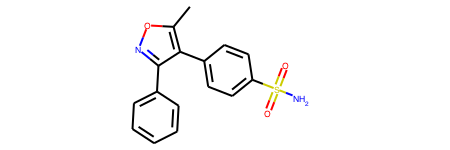

In [82]:
Chem.MolFromSmiles(df1.SMILES_CANONICAL.values[434322])

[4.84603394 4.91070503 5.55209779 5.16598714 5.1792614  5.13586798
 5.16046749 5.30454883 5.05099129 5.06819069]
[7.81497555 7.65100758 8.66553183 8.17174286 7.80529678 7.64486975
 7.69770563 6.84000987 6.66258114 7.64916641]
['50 - 100' '50 - 100' '50 - 100' '50 - 100' '50 - 100' '50 - 100'
 '100 - 500' 'null' '50 - 100' 'null']


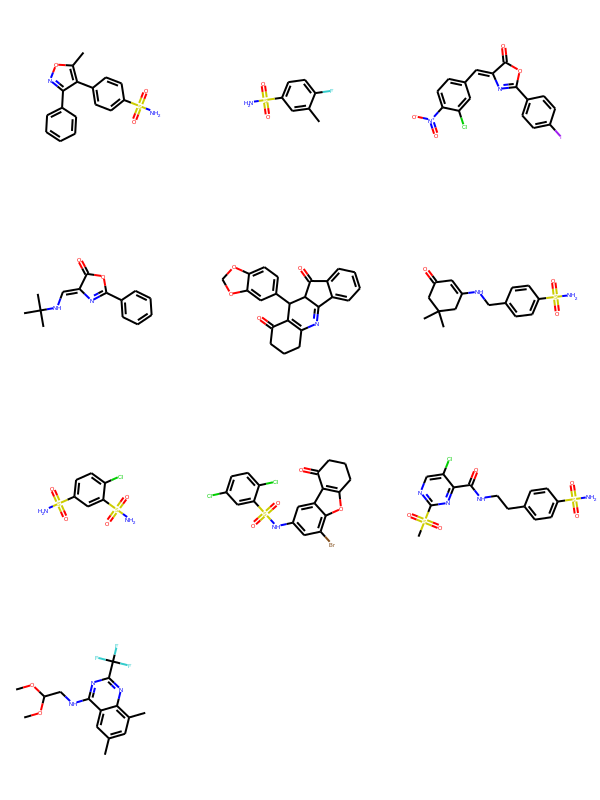

In [85]:
vals = np.argsort(df_val2)[:10]
print(preds_c1_rf[vals])
print(preds_c2_rf[vals])
print(df1.PRICERANGE_50MG.values[vals])
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(df1.SMILES_CANONICAL[df1.index[x]]) for x in vals])

In [88]:
def get_results(fn):
    df1 = pd.read_csv(fn, low_memory=False)
    result = df1['fps'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))
    fps = np.vstack(result)
    
    preds_c1_rdg = mdl_holder['COX-1']['ridge'].predict(fps)
    preds_c2_rdg = mdl_holder['COX-2']['ridge'].predict(fps)
    preds_c1_rf  = mdl_holder['COX-1']['rf'].predict(fps)
    preds_c2_rf  = mdl_holder['COX-2']['rf'].predict(fps)
    
    df_val2 = -preds_c2_rdg + preds_c1_rdg - preds_c2_rf + preds_c1_rf
    
    vals = np.argsort(df_val2)[:10]
    print('Cox1 predictions (rf)', preds_c1_rf[vals])
    print('Cox2 predictions (rf)', preds_c2_rf[vals])
    print('Prices (50MG)')
    print(df1.PRICERANGE_50MG.values[vals])
    return Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(df1.SMILES_CANONICAL[df1.index[x]]) for x in vals])
    

Cox1 predictions (rf) [4.84603394 4.91070503 5.55209779 5.16598714 5.1792614  5.13586798
 5.16046749 5.30454883 5.05099129 5.06819069]
Cox2 predictions (rf) [7.81497555 7.65100758 8.66553183 8.17174286 7.80529678 7.64486975
 7.69770563 6.84000987 6.66258114 7.64916641]
Prices (50MG)
['50 - 100' '50 - 100' '50 - 100' '50 - 100' '50 - 100' '50 - 100'
 '100 - 500' 'null' '50 - 100' 'null']


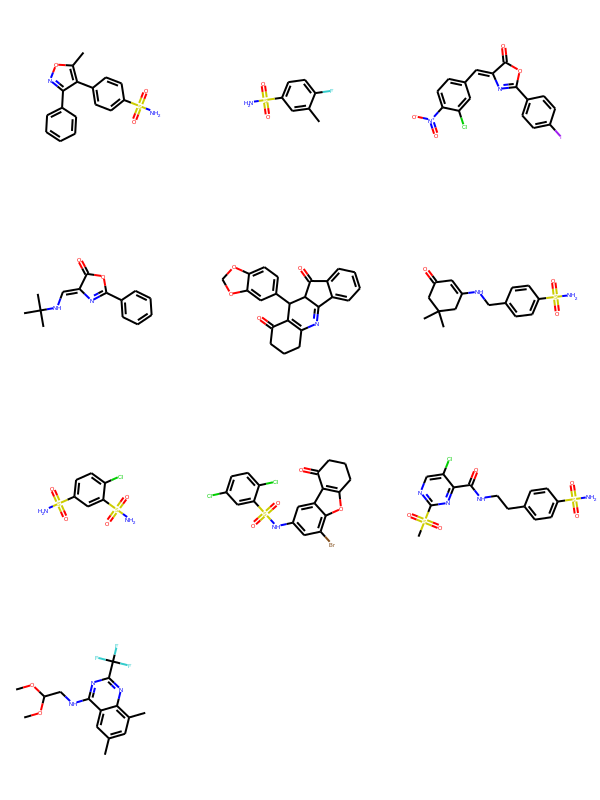

In [89]:
get_results(std_files[0])

Cox1 predictions (rf) [4.99065353 5.13719474 4.98825961 5.14404105 5.15115306 5.3543467
 5.21631448 5.18459775 5.49754194 5.18053416]
Cox2 predictions (rf) [8.42878736 7.99375443 8.47068598 8.02504192 8.12813735 8.17406242
 7.90494519 7.72675382 8.67365846 8.10789606]
Prices (50MG)
['50 - 100' '100 - 500' '100 - 500' '50 - 100' '100 - 500' '50 - 100'
 '50 - 100' 'null' '100 - 500' '100 - 500']


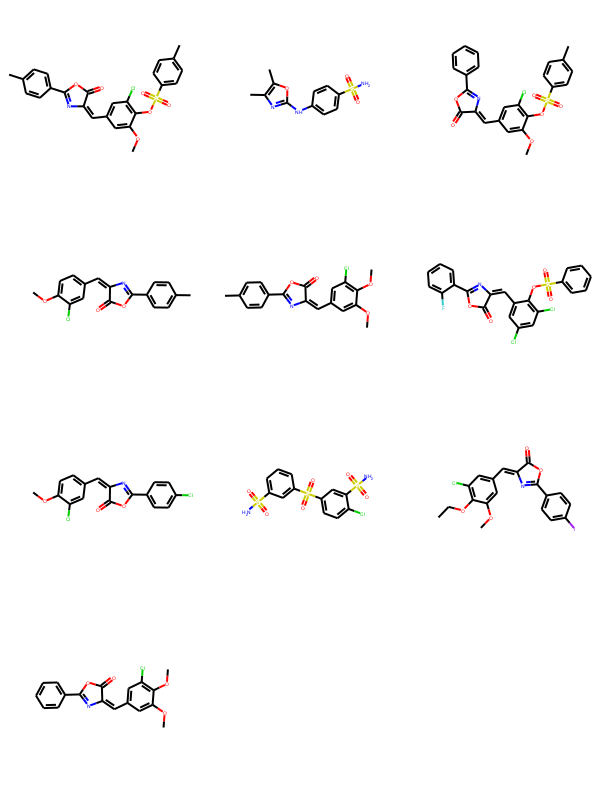

In [90]:
get_results(std_files[1])

Cox1 predictions (rf) [5.19407155 5.15557974 5.37212607 5.20099077 5.28450118 5.50324129
 5.07368817 5.40894963 5.20199106 5.29104251]
Cox2 predictions (rf) [7.45777992 8.18855049 7.58904833 7.38623731 8.1670326  8.34085055
 7.04180448 7.07794584 7.14135711 6.45619532]
Prices (50MG)
['100 - 500' '100 - 500' '100 - 500' '100 - 500' '100 - 500' '100 - 500'
 '100 - 500' '50 - 100' '50 - 100' '100 - 500']


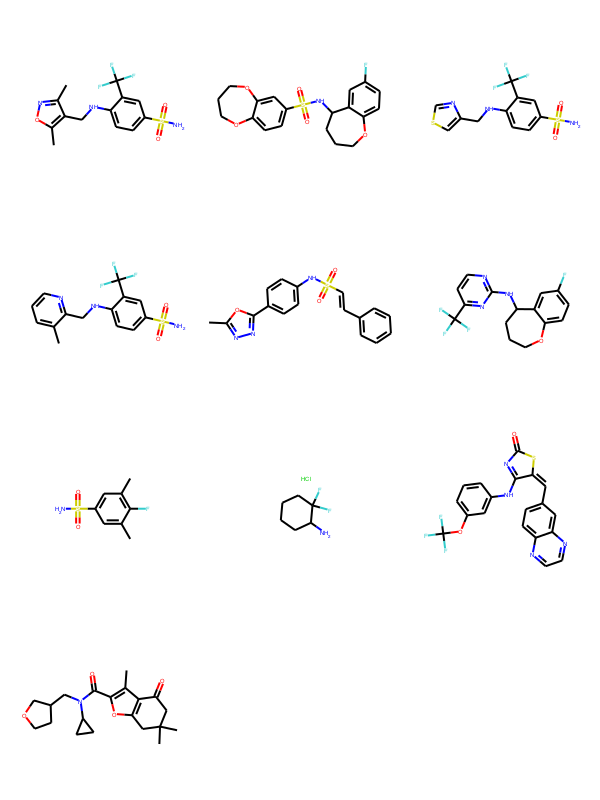

In [91]:
get_results(std_files[2])

Cox1 predictions (rf) [5.13094781 5.40376057 5.2651598  5.0576773  5.12943446 5.20685891
 5.1625308  5.39970934 5.12643913 5.22817295]
Cox2 predictions (rf) [8.14932293 7.64989134 7.95179903 8.25369235 7.32276165 7.33295319
 7.41860554 7.83222248 7.25549978 7.68501754]
Prices (50MG)
['null' 'null' 'null' '100 - 500' 'null' '100 - 500' '100 - 500'
 '100 - 500' '100 - 500' '100 - 500']


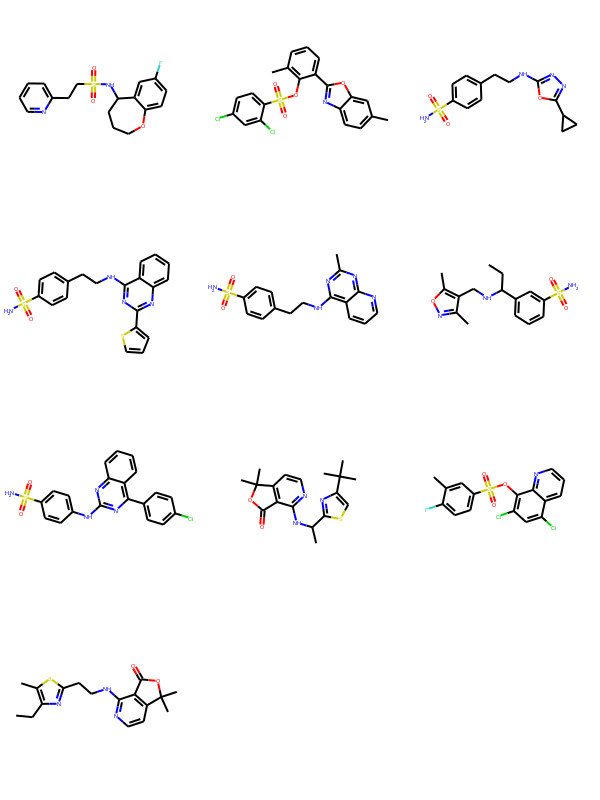

In [92]:
get_results(std_files[3])

Cox1 predictions (rf) [5.03142115 5.2186205  5.24832504 5.00925098 5.55178777 5.31723214
 5.2603014  5.09476151 5.27663662 5.59422375]
Cox2 predictions (rf) [8.31178979 8.08448519 7.93984786 7.384969   8.07662123 8.32981877
 7.91001333 7.2276516  7.49728994 7.38861308]
Prices (50MG)
['50 - 100' '50 - 100' '50 - 100' '100 - 500' '100 - 500' '100 - 500'
 '100 - 500' '100 - 500' '100 - 500' 'null']


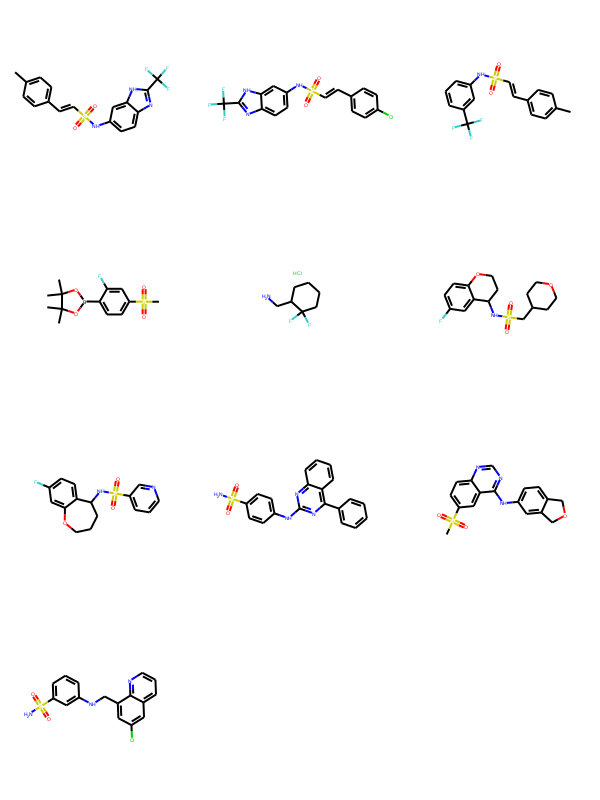

In [93]:
get_results(std_files[4])

Cox1 predictions (rf) [5.19478782 5.34099721 5.20543946 5.16928094 4.93667782 5.15115306
 5.38707251 5.19254967 5.25730583 5.27874776]
Cox2 predictions (rf) [8.23910875 8.12557477 7.92443578 7.91987537 7.84829698 8.12813735
 8.02564038 8.05293571 7.92741112 7.76467856]
Prices (50MG)
['100 - 500' 'null' '100 - 500' '100 - 500' 'null' '100 - 500' '100 - 500'
 '100 - 500' '100 - 500' 'null']


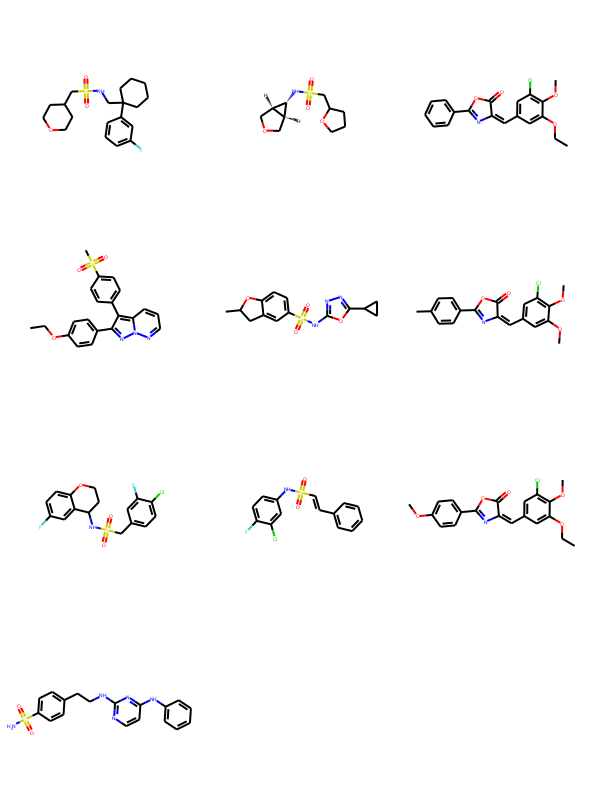

In [94]:
get_results(std_files[5])

Cox1 predictions (rf) [5.09834353 5.31524122 5.24080578 5.18867872 5.49345424 5.34452776
 5.25751469 4.76706604 5.66562001 5.38405149]
Cox2 predictions (rf) [7.39455961 7.88541425 7.54948677 8.27542928 7.55402405 7.4633837
 8.29648566 7.43387232 7.74844749 7.21359571]
Prices (50MG)
['null' 'null' '100 - 500' '100 - 500' '100 - 500' '> 1000' 'null'
 '100 - 500' 'null' '100 - 500']


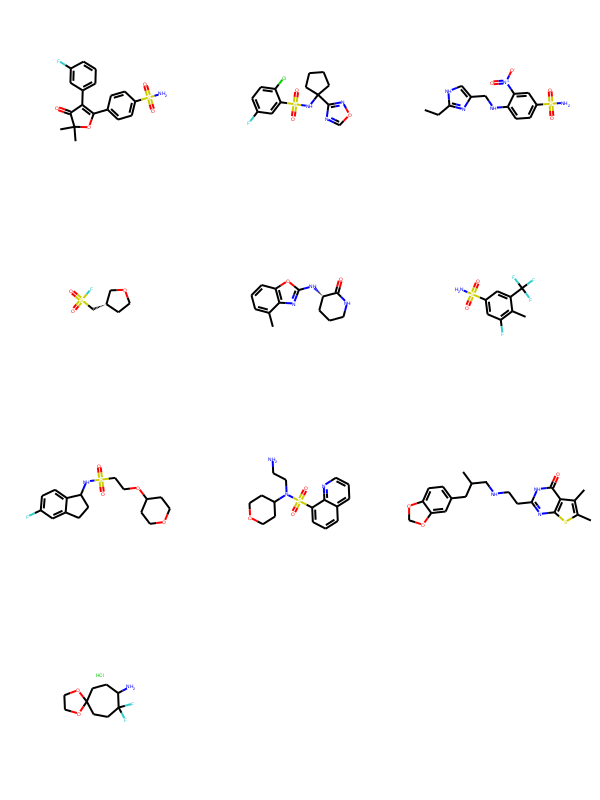

In [95]:
get_results(std_files[6])

Cox1 predictions (rf) [5.34043029 5.19056049 5.08708739 5.27634431 5.65007301 5.0484133
 5.21721178 5.17292024 5.27239414 5.20712225]
Cox2 predictions (rf) [7.60748736 8.08083686 8.22968216 7.93547778 8.1316026  8.32388666
 8.19588783 6.94884312 7.89049648 7.55296215]
Prices (50MG)
['100 - 500' '100 - 500' '100 - 500' 'null' '50 - 100' '50 - 100'
 '100 - 500' '100 - 500' '100 - 500' '50 - 100']


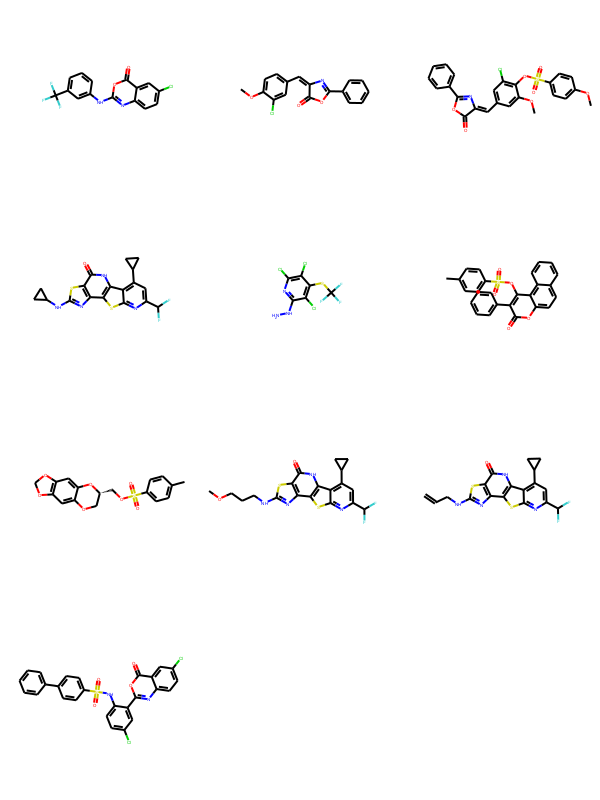

In [96]:
get_results(std_files[7])

Cox1 predictions (rf) [5.45149074 5.0746186  5.19376262 5.53369766 5.10139157 5.45630073
 5.14934575 5.23464959 5.10330991 5.30301118]
Cox2 predictions (rf) [8.82131615 8.32644015 7.77499039 7.68847399 7.93325068 7.46200381
 7.74249683 7.51399842 7.7720261  7.72114522]
Prices (50MG)
['100 - 500' '100 - 500' '100 - 500' 'null' 'null' '100 - 500' 'null'
 '100 - 500' '100 - 500' '100 - 500']


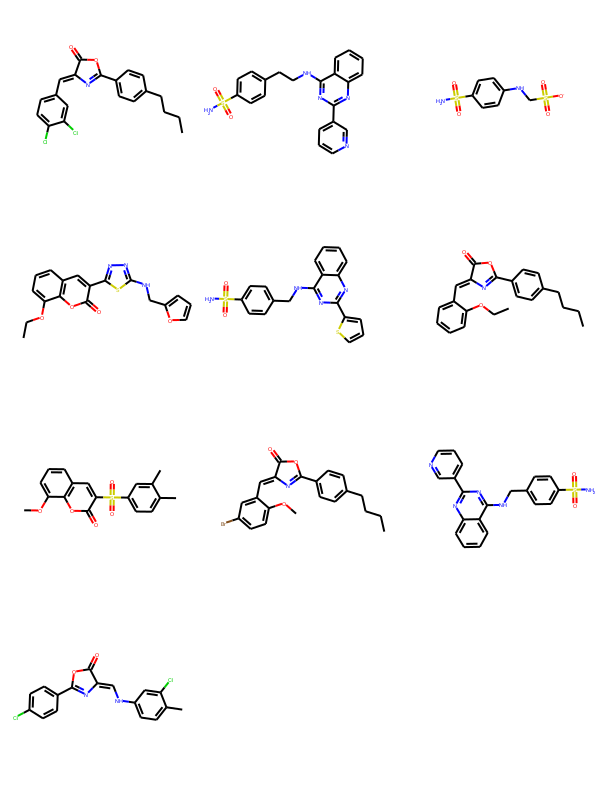

In [97]:
get_results(std_files[8])

Cox1 predictions (rf) [5.44235635 5.12125668 5.23534472 5.14916622 5.40839636 5.72870053
 5.23220937 5.17898795 5.22319689 5.48699828]
Cox2 predictions (rf) [8.2043996  8.51435093 8.0897036  7.745092   7.37193488 8.11335206
 7.52101621 7.45503996 7.75874044 8.0297135 ]
Prices (50MG)
['null' '100 - 500' '100 - 500' '100 - 500' '100 - 500' '100 - 500'
 '100 - 500' '100 - 500' '100 - 500' '100 - 500']


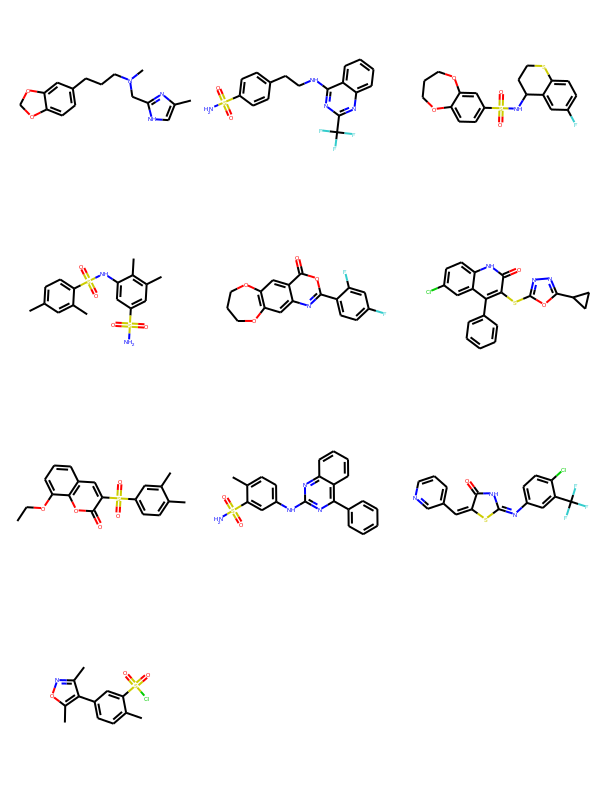

In [98]:
get_results(std_files[9])

Cox1 predictions (rf) [5.28998558 5.3822018  5.14930335 5.00064664 5.27268726 5.2845745
 5.62184406 5.75628766 5.21591504 5.12861402]
Cox2 predictions (rf) [7.84608562 7.66212161 7.76743889 6.39589786 7.23961888 7.54847566
 8.16825971 8.28943173 7.22012273 7.82430208]
Prices (50MG)
['100 - 500' '100 - 500' 'null' '50 - 100' 'null' '50 - 100' '100 - 500'
 '100 - 500' '100 - 500' '100 - 500']


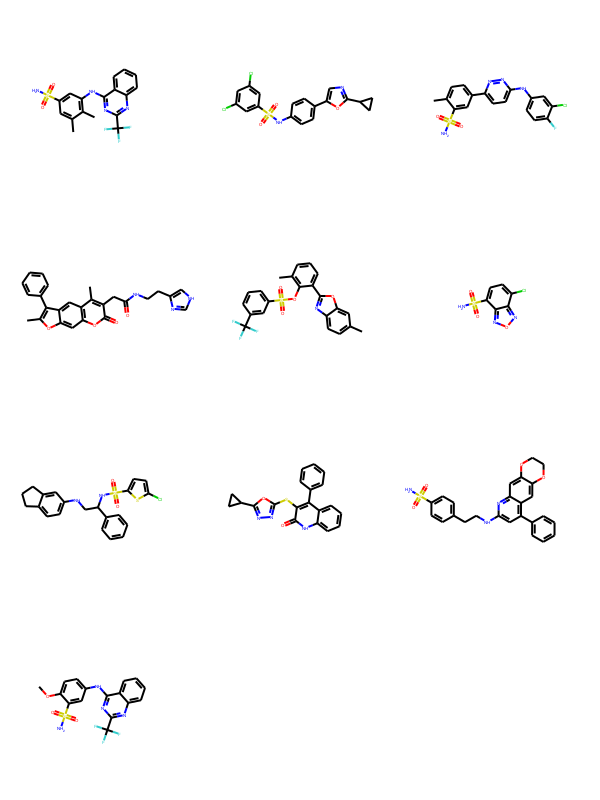

In [99]:
get_results(std_files[10])

Cox1 predictions (rf) [5.24911763 5.60035251 5.27709971 5.1901274  5.18410042 5.19534972
 5.17615961 5.20186181 5.23720916 5.22360333]
Cox2 predictions (rf) [8.17872724 7.4416168  7.59871773 7.77051278 7.60429167 7.69067937
 7.94134496 7.76587187 7.9322829  7.48161472]
Prices (50MG)
['100 - 500' 'null' '100 - 500' '100 - 500' '100 - 500' 'null' '100 - 500'
 '100 - 500' 'null' '100 - 500']


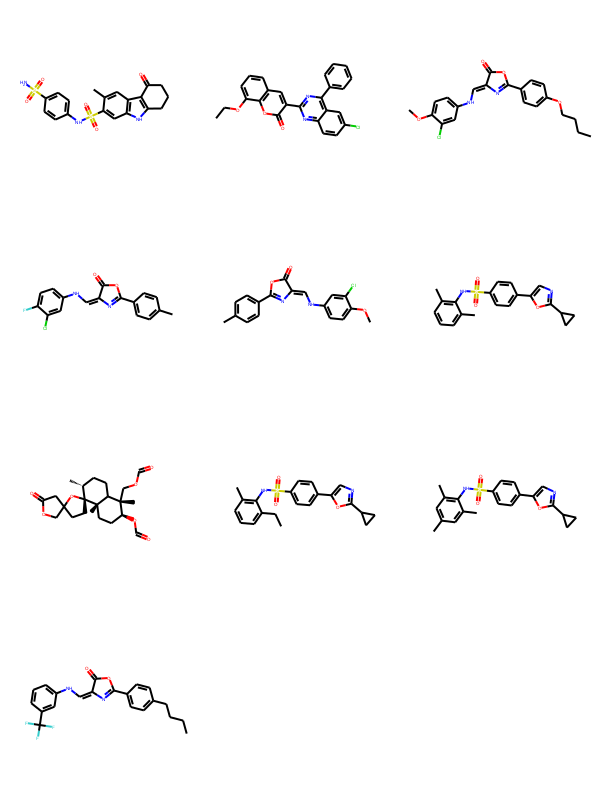

In [100]:
get_results(std_files[11])

Cox1 predictions (rf) [5.08968764 5.16361189 5.19789529 5.17305181 5.31503335 5.1680042
 5.43416748 5.16857094 5.21549235 4.95170186]
Cox2 predictions (rf) [8.39642922 7.5441755  7.59424979 7.64354951 8.50098458 7.77531244
 8.0904732  8.14519886 8.16992962 6.72950047]
Prices (50MG)
['null' '50 - 100' '100 - 500' '100 - 500' 'null' '100 - 500' '100 - 500'
 '100 - 500' '100 - 500' '100 - 500']


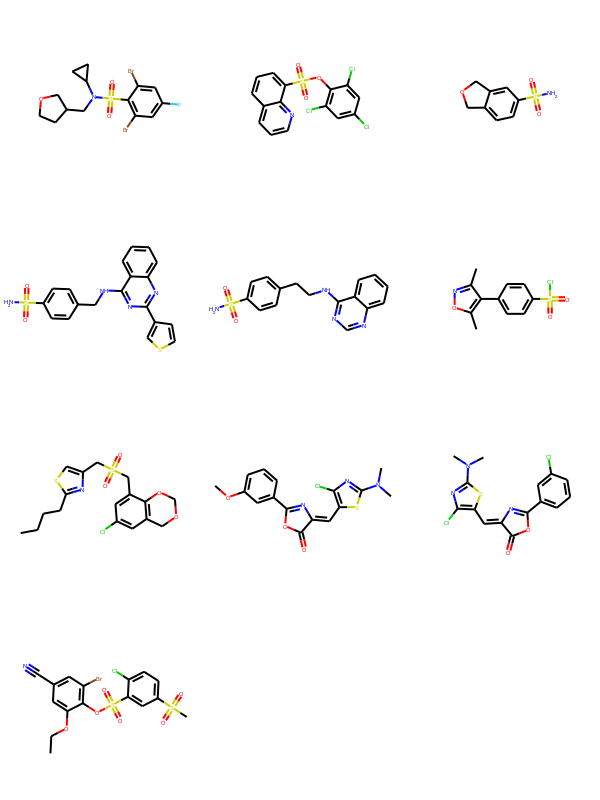

In [101]:
get_results(std_files[12])

Cox1 predictions (rf) [5.33841876 5.21754556 5.36383752 5.22974204 5.16216192 5.23750963
 5.72782708 5.20761849 5.34219446 5.18763115]
Cox2 predictions (rf) [8.24147171 8.32936152 7.79871685 8.14928081 7.64928717 8.46046278
 8.03931983 8.18932103 8.07169786 7.77288612]
Prices (50MG)
['100 - 500' '100 - 500' '100 - 500' '100 - 500' '100 - 500' '100 - 500'
 '100 - 500' '100 - 500' 'null' 'null']


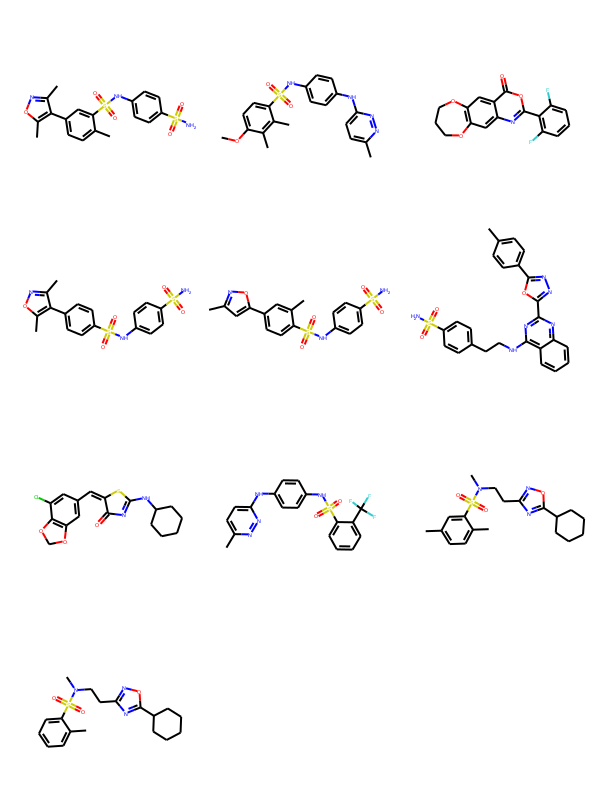

In [102]:
get_results(std_files[13])

Cox1 predictions (rf) [5.03966022 5.43793142 5.62544989 5.24874081 5.39282964 5.38156736
 5.53259785 5.55667074 5.43267213 5.15641923]
Cox2 predictions (rf) [8.43328804 7.97174115 7.783917   8.80176114 8.12061087 8.31017625
 7.74769677 8.37324521 7.66776671 8.22189824]
Prices (50MG)
['null' 'null' '100 - 500' 'null' '100 - 500' 'null' '100 - 500'
 '50 - 100' '50 - 100' '100 - 500']


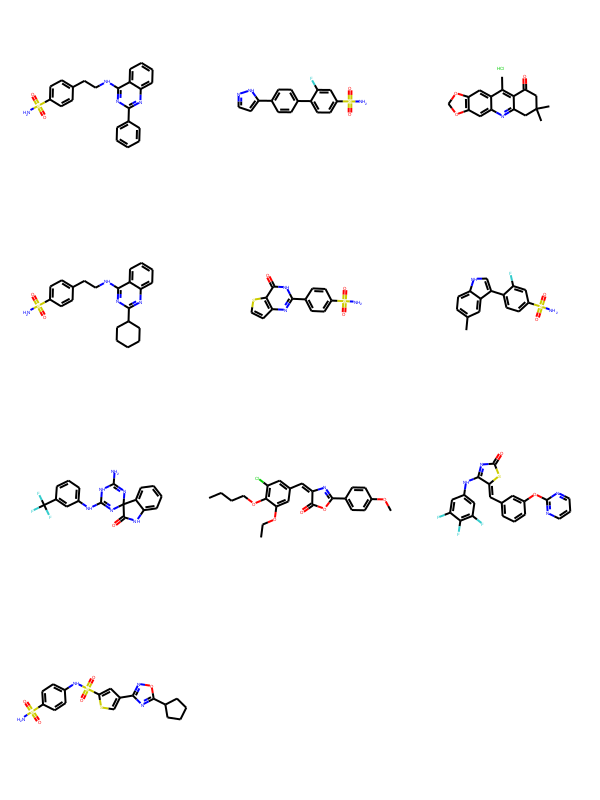

In [103]:
get_results(std_files[14])